## The Protein Puzzle: Unraveling the Complexities of Diet and Life Expectancy

In [2571]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
sns.set_style("whitegrid")
from importlib import reload
plt=reload(plt)


In [2053]:
df.columns


Index(['entity', 'code', 'year', 'fish', 'poultry', 'pork', 'beef',
       'sheep/goat', 'other', 'eggs', 'milk', 'total_protein', 'life_exp',
       'gdp_per_capita', 'population', 'daily_cal_animal_protein',
       'daily_cal_veg_protein', 'daily_cal_fat', 'daily_cal_carbs',
       'total_daily_protein', 'all_cause_per_100k', 'cals_from_protein',
       'daily_caloric_intake', 'non_protein_cals', 'veg_protein_ratio',
       'animal_protein_ratio', 'region'],
      dtype='object')

# cleaning

In [2507]:
protein_one = pd.read_csv('/Users/jonathanfarro/Desktop/animal-protein-consumption.csv')

life_ex = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/life-expectancy-hmd-unwpp.csv')

usa_pricing = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/average_prices_for_food.csv')

daily_cals = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv')

fruit_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/fruit-consumption-per-capita.csv')

veg_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/vegetable-consumption-per-capita/vegetable-consumption-per-capita.csv' )

nutrition =  pd.read_excel('/Users/jonathanfarro/Desktop/ Capstone Files/food_comp.xlsx')

protein_per_GDP = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-per-capita-protein-supply-vs-gdp-per-capita.csv')

death = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/death-rate-by-cause-who-mdb.csv')



In [2508]:
# rename columns to something easier to work with 

protein = protein_one.rename(columns={
                        protein_one.columns[3]:'fish',
                        protein_one.columns[4]:'poultry',
                        protein_one.columns[5]:'pork',
                        protein_one.columns[6]:'beef',
                        protein_one.columns[7]:'sheep/goat',
                        protein_one.columns[8]:'other',
                        protein_one.columns[9]:'eggs',
                        protein_one.columns[10]:'milk'
                       })

In [2509]:
# bulk clean up 
protein = protein.rename(columns=lambda x: x.lower())
protein = protein.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)

life_ex = life_ex.rename(columns = lambda x: x.lower())
life_ex = life_ex.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
life_ex = life_ex.rename(columns = {life_ex.columns[3] : 'life_expectancy(0)'})

protein_per_GDP = protein_per_GDP.rename(columns = lambda x: x.lower())
protein_per_GDP = protein_per_GDP.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
gdp_population = protein_per_GDP.drop(columns= {protein_per_GDP.columns[3],protein_per_GDP.columns[6]})
gdp_population = gdp_population.rename(columns = { gdp_population.columns[3]: 'gdp_per_capita'}) 


daily_cals = daily_cals.rename(columns = lambda x: x.lower())
daily_cals = daily_cals.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

death = death.rename(columns = lambda x: x.lower())
death = death.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

nutrition = nutrition.rename(columns = lambda x: x.lower())
nutrition = nutrition.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)

# creating a new column to show total_protein intake for a day.
protein['total_protein'] = protein.iloc[:, 3:11].sum(axis = 1).round(2)



In [2510]:
capstone = pd.merge(protein,
         life_ex,
         on= ['entity','code','year'],
         how= 'inner')

#capstone.head()

capstone_2 = pd.merge( capstone, gdp_population, on = ['entity','code','year'],how= 'inner')

main_frame = pd.merge(capstone_2,death,  on = ['entity','code','year'],how= 'outer')

final_frame = pd.merge(main_frame, daily_cals,  on = ['entity','code','year'],how= 'outer')

final_frame['total_daily_protein']=final_frame.iloc[:, 3:10].sum(axis=1)

final_frame = final_frame.rename(columns= { 'daily calorie supply per person that comes from animal protein':'daily_cal_animal_protein',
                                            'daily calorie supply per person that comes from vegetal protein':'daily_cal_veg_protein',
                                            'daily calorie supply per person from fat':'daily_cal_fat',
                                            'daily calorie supply per person from carbohydrates':'daily_cal_carbs'})
final_frame.entity.unique()




array(['afghanistan', 'africa', 'africa (fao)', 'albania', 'algeria',
       'americas (fao)', 'angola', 'antigua and barbuda', 'argentina',
       'armenia', 'asia', 'asia (fao)', 'australia', 'austria',
       'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados',
       'belarus', 'belgium', 'belgium-luxembourg (fao)', 'belize',
       'benin', 'bermuda', 'bhutan', 'bolivia', 'bosnia and herzegovina',
       'botswana', 'brazil', 'brunei', 'bulgaria', 'burkina faso',
       'burundi', 'cambodia', 'cameroon', 'canada', 'cape verde',
       'caribbean (fao)', 'central african republic',
       'central america (fao)', 'central asia (fao)', 'chad', 'chile',
       'china', 'china (fao)', 'colombia', 'comoros', 'congo',
       'costa rica', "cote d'ivoire", 'croatia', 'cuba', 'cyprus',
       'czechia', 'czechoslovakia', 'democratic republic of congo',
       'denmark', 'djibouti', 'dominica', 'dominican republic',
       'east timor', 'eastern africa (fao)', 'eastern asia (fao)'

In [2511]:
#creating an all_cause_mortality column, and more cleaning

final_frame['all_cause_per_100k'] = final_frame.iloc[:,15:24].sum(axis=1)

final_frame_two = final_frame.drop(columns=final_frame.columns[15:24])

final_frame_three = final_frame_two[~final_frame_two['entity'].str.contains(r'\(.*\)')]

final = final_frame_three
final = final.rename(columns={'life_expectancy(0)':'life_exp','population (historical)':'population'})

In [2512]:
#further cleaning.

non_countries_list = ['asia','europe','high-income countries','low-income countries','lower-middle-income countries','oceania','upper-middle-income countries','world']
income_classes= ['low-income countries','high-income countries','lower-middle-income countries','upper-middle-income countries','world']

final_countries = final.loc[~final['entity'].isin(non_countries_list)]

income_class = final.loc[final['entity'].isin(income_classes)]

income_class['veg_protein_ratio'] = income_class['daily_cal_veg_protein']/ income_class['daily_cal_animal_protein']
income_class['animal_protein_ratio']= income_class['daily_cal_animal_protein']/income_class['daily_cal_veg_protein']




testdrop= final_countries

df = testdrop.dropna()

df['cals_from_protein'] = df['daily_cal_animal_protein'] + df['daily_cal_veg_protein']

df['daily_caloric_intake'] = df.iloc[:,15:19].sum(axis=1)
df['non_protein_cals']= df['daily_cal_fat'] + df['daily_cal_carbs'] 
income_class['daily_caloric_intake'] = income_class.iloc[:,15:19].sum(axis=1)


df['veg_protein_ratio'] = df['daily_cal_veg_protein']/  df['daily_cal_animal_protein']
df['animal_protein_ratio']= df['daily_cal_animal_protein']/df['daily_cal_veg_protein']



/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/951470459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_class['veg_protein_ratio'] = income_class['daily_cal_veg_protein']/ income_class['daily_cal_animal_protein']
/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/951470459.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_class['animal_protein_ratio']= income_class['daily_cal_animal_protein']/income_class['daily_cal_veg_protein']
/var/folders/q1/g8w_03zs6

In [2513]:
income_class = income_class.loc[income_class['entity']!= 'world']


In [2514]:
country_to_region = {
    'algeria': 'Africa',
    'angola': 'Africa',
    'benin': 'Africa',
    'botswana': 'Africa',
    'burkina faso': 'Africa',
    'burundi': 'Africa',
    'cabo verde': 'Africa',
    'cameroon': 'Africa',
    'central african republic': 'Africa',
    'chad': 'Africa',
    'comoros': 'Africa',
    'congo, democratic republic of the': 'Africa',
    'congo, republic of the': 'Africa',
    "côte d'ivoire": 'Africa',
    'djibouti': 'Africa',
    'egypt': 'Africa',
    'equatorial guinea': 'Africa',
    'eritrea': 'Africa',
    'eswatini': 'Africa',
    'ethiopia': 'Africa',
    'gabon': 'Africa',
    'gambia': 'Africa',
    'ghana': 'Africa',
    'guinea': 'Africa',
    'guinea-bissau': 'Africa',
    'kenya': 'Africa',
    'lesotho': 'Africa',
    'liberia': 'Africa',
    'libya': 'Africa',
    'madagascar': 'Africa',
    'malawi': 'Africa',
    'mali': 'Africa',
    'mauritania': 'Africa',
    'mauritius': 'Africa',
    'morocco': 'Africa',
    'mozambique': 'Africa',
    'namibia': 'Africa',
    'niger': 'Africa',
    'nigeria': 'Africa',
    'rwanda': 'Africa',
    'sao tome and principe': 'Africa',
    'senegal': 'Africa',
    'seychelles': 'Africa',
    'sierra leone': 'Africa',
    'somalia': 'Africa',
    'south africa': 'Africa',
    'south sudan': 'Africa',
    'sudan': 'Africa',
    'tanzania': 'Africa',
    'togo': 'Africa',
    'tunisia': 'Africa',
    'uganda': 'Africa',
    'zambia': 'Africa',
    'zimbabwe': 'Africa',
    'afghanistan': 'Asia',
    'armenia': 'Asia',
    'azerbaijan': 'Asia',
    'bahrain': 'Asia',
    'bangladesh': 'Asia',
    'bhutan': 'Asia',
    'brunei': 'Asia',
    'cambodia': 'Asia',
    'china': 'Asia',
    'cyprus': 'Asia', 
    'georgia': 'Asia',
    'india': 'Asia',
    'indonesia': 'Asia',
    'iran': 'Asia',
    'iraq': 'Asia',
    'israel': 'Asia',
    'japan': 'Asia',
    'jordan': 'Asia',
    'kazakhstan': 'Asia',
    'kuwait': 'Asia',
    'kyrgyzstan': 'Asia',
    'laos': 'Asia',
    'lebanon': 'Asia',
    'malaysia': 'Asia',
    'maldives': 'Asia',
    'mongolia': 'Asia',
    'myanmar': 'Asia',
    'nepal': 'Asia',
    'north korea': 'Asia',
    'oman': 'Asia',
    'pakistan': 'Asia',
    'palestine': 'Asia',
    'philippines': 'Asia',
    'qatar': 'Asia',
    'russia': 'Asia', # Mostly in Asia
    'saudi arabia': 'Asia',
    'singapore': 'Asia',
    'south korea': 'Asia',
    'sri lanka': 'Asia',
    'syria': 'Asia',
    'tajikistan': 'Asia',
    'thailand': 'Asia',
    'timor-leste': 'Asia',
    'turkey': 'Asia', # Mostly in Asia
    'turkmenistan': 'Asia',
    'united arab emirates': 'Asia',
    'uzbekistan': 'Asia',
    'vietnam': 'Asia',
    'yemen': 'Asia',
    'macao':'Asia',
    'albania': 'Europe',
    'andorra': 'Europe',
    'austria': 'Europe',
    'belarus': 'Europe',
    'belgium': 'Europe',
    'bosnia and herzegovina': 'Europe',
    'bulgaria': 'Europe',
    'croatia': 'Europe',
    'czech republic': 'Europe',
    'denmark': 'Europe',
    'estonia': 'Europe',
    'finland': 'Europe',
    'france': 'Europe',
    'germany': 'Europe',
    'greece': 'Europe',
    'hungary': 'Europe',
    'iceland': 'Europe',
    'ireland': 'Europe',
    'italy': 'Europe',
    'kosovo': 'Europe',
    'latvia': 'Europe',
    'liechtenstein': 'Europe',
    'lithuania': 'Europe',
    'luxembourg': 'Europe',
    'malta': 'Europe',
    'moldova': 'Europe',
    'monaco': 'Europe',
    'montenegro': 'Europe',
    'netherlands': 'Europe',
    'north macedonia': 'Europe',
    'norway': 'Europe',
    'poland': 'Europe',
    'portugal': 'Europe',
    'romania': 'Europe',
    'russia': 'Europe', 
    'san marino': 'Europe',
    'serbia': 'Europe',
    'slovakia': 'Europe',
    'slovenia': 'Europe',
    'spain': 'Europe',
    'sweden': 'Europe',
    'switzerland': 'Europe',
    'ukraine': 'Europe',
    'united kingdom': 'Europe',
    'vatican city': 'Europe', 
    'antigua and barbuda': 'North America',
    'bahamas': 'North America',
    'barbados': 'North America',
    'belize': 'North America',
    'canada': 'North America',
    'costa rica': 'North America',
    'cuba': 'North America',
    'dominica': 'North America',
    'dominican republic': 'North America',
    'el salvador': 'North America',
    'grenada': 'North America',
    'guatemala': 'North America',
    'haiti': 'North America',
    'honduras': 'North America',
    'jamaica': 'North America',
    'mexico': 'North America',
    'nicaragua': 'North America',
    'panama': 'North America',
    'saint kitts and nevis': 'North America',
    'saint lucia': 'North America',
    'saint vincent and the grenadines': 'North America',
    'trinidad and tobago': 'North America',
    'united states': 'North America',
    'australia': 'Oceania',
    'fiji': 'Oceania',
    'kiribati': 'Oceania',
    'marshall islands': 'Oceania',
    'micronesia': 'Oceania',
    'nauru': 'Oceania',
    'new zealand': 'Oceania',
    'palau': 'Oceania',
    'papua new guinea': 'Oceania',
    'samoa': 'Oceania',
    'solomon islands': 'Oceania',
    'tonga': 'Oceania',
    'tuvalu': 'Oceania',
    'vanuatu': 'Oceania',
    'argentina': 'South America',
    'bolivia': 'South America',
    'brazil': 'South America',
    'chile': 'South America',
    'colombia': 'South America',
    'ecuador': 'South America',
    'guyana': 'South America',
    'paraguay': 'South America',
    'peru': 'South America',
    'suriname': 'South America',
    'uruguay': 'South America',
    'venezuela': 'South America',
}

df['region'] = df['entity'].map(country_to_region)

df['entity'] = df['entity'].str.title()

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/114576040.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['entity'].map(country_to_region)
/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/114576040.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entity'] = df['entity'].str.title()


In [2515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5049 entries, 53 to 13407
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    5049 non-null   object 
 1   code                      5049 non-null   object 
 2   year                      5049 non-null   int64  
 3   fish                      5049 non-null   float64
 4   poultry                   5049 non-null   float64
 5   pork                      5049 non-null   float64
 6   beef                      5049 non-null   float64
 7   sheep/goat                5049 non-null   float64
 8   other                     5049 non-null   float64
 9   eggs                      5049 non-null   float64
 10  milk                      5049 non-null   float64
 11  total_protein             5049 non-null   float64
 12  life_exp                  5049 non-null   float64
 13  gdp_per_capita            5049 non-null   float64
 14  population 

# correlation chart

Text(0.5, 1.0, 'Correlation Matrix')

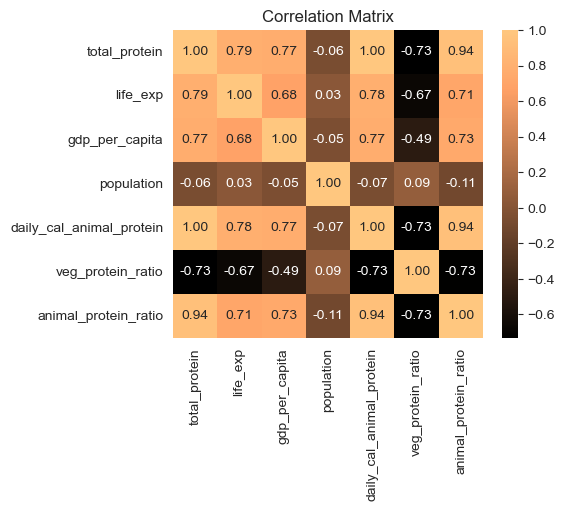

In [2517]:
cols_to_include = df.columns[11:15].tolist() + df.columns[15:16].tolist() + df.columns[24:26].tolist() 

# Calculate the correlation matrix
corr = df[cols_to_include].corr()
corr

rs = np.random.RandomState(0)

corr.style.background_gradient(cmap='copper_r')
plt.figure(figsize=(5, 4))  # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='copper', fmt=".2f")
plt.title('Correlation Matrix')



#  What is the correlation between the consumption of food types per capita and life expectancy across different countries, and how has this correlation changed over time? 


In [2519]:
df.life_exp.mean().round()

69.0

In [2078]:
df.columns

Index(['entity', 'code', 'year', 'fish', 'poultry', 'pork', 'beef',
       'sheep/goat', 'other', 'eggs', 'milk', 'total_protein', 'life_exp',
       'gdp_per_capita', 'population', 'daily_cal_animal_protein',
       'daily_cal_veg_protein', 'daily_cal_fat', 'daily_cal_carbs',
       'total_daily_protein', 'all_cause_per_100k', 'cals_from_protein',
       'daily_caloric_intake', 'non_protein_cals', 'veg_protein_ratio',
       'animal_protein_ratio', 'region'],
      dtype='object')

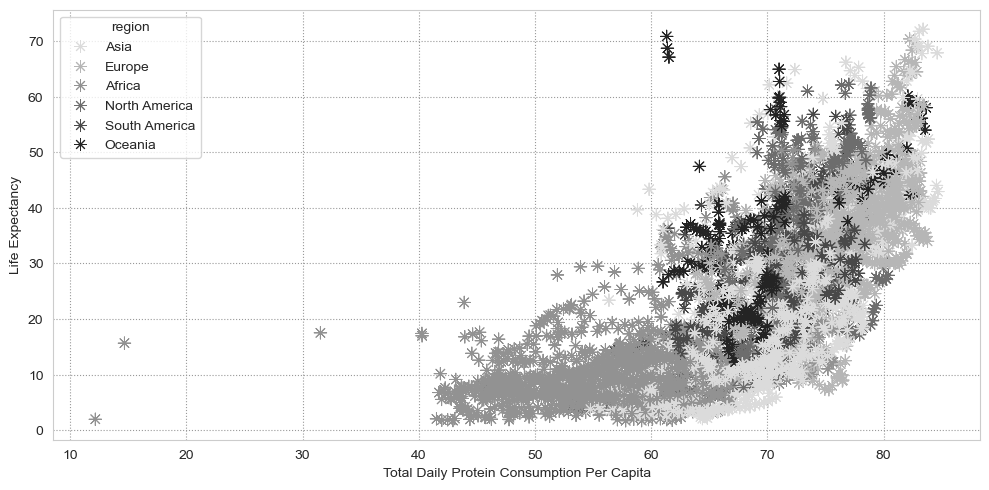

In [2082]:
plt.figure(figsize=(10, 5))

sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(
    data=df, y="total_daily_protein", x="life_exp",
     marker=(8,2,0),hue='region',palette='binary',s=80)

plt.tight_layout()
plt.xlabel("Total Daily Protein Consumption Per Capita")
plt.ylabel('Life Expectancy')
plt.savefig('yolo.png',transparent=True)


In [2334]:
forplot = df.groupby(['region','year']).agg({'life_exp':'mean','total_daily_protein':'mean','gdp_per_capita':'mean'})
forplot = forplot.reset_index()
forplot

,region,year,life_exp,total_daily_protein,gdp_per_capita
0,Africa,1990,53.375178,9.751840,3624.672100
1,Africa,1991,53.403858,9.730757,3638.417565
2,Africa,1992,53.313683,9.821260,3559.760626
3,Africa,1993,53.113138,9.366487,3414.421289
4,Africa,1994,52.199362,9.094075,3415.872906
...,...,...,...,...,...
187,South America,2017,74.502300,35.359912,16023.592091
188,South America,2018,74.723500,36.558099,16153.217273
189,South America,2019,74.833300,37.189930,16115.368455
190,South America,2020,73.127536,37.086339,15318.883545


In [1885]:
df.life_exp.mean().round()
print(f'The average life expectancy covered in this dataset is {df.life_exp.mean().round()} years old,')
print(f'We can see from the scatterplot above that life expectancy of a country and total protein consumption per day has a strong positive correlation.')

The average life expectancy covered in this dataset is 69.0 years old,
We can see from the scatterplot above that life expectancy of a country and total protein consumption per day has a strong positive correlation.


# Do countries with a higher ratio vegetables protein consumption compared to animal protein exhibit higher life expectancies, and how does this relationship vary across different regions?

In [1918]:
# splitting the df to show two styles of diets 
more_meat = df.loc[df['animal_protein_ratio'] > df['veg_protein_ratio']]

more_veg = df.loc[df['veg_protein_ratio'] > df['animal_protein_ratio']]

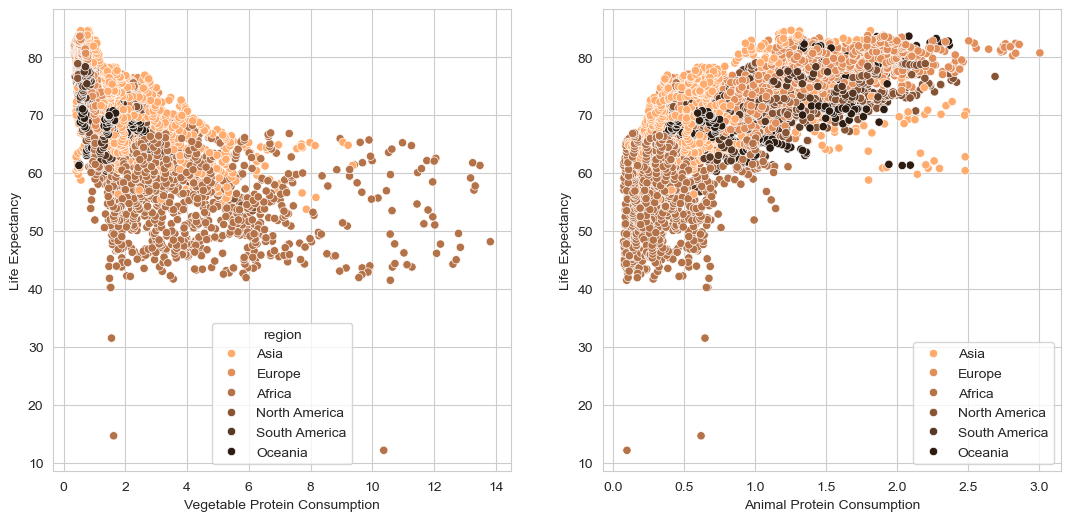

In [2543]:
plt.figure(figsize=(13, 6))

sns.set_style("whitegrid")
plt.subplot(1, 2, 1)
sns.scatterplot(x= df['veg_protein_ratio'],y=df['life_exp'],hue=df['region'],palette='copper_r')
plt.xlabel('Vegetable Protein Consumption')
plt.ylabel('Life Expectancy')
plt.subplot(1, 2, 2)
sns.scatterplot(x= df['animal_protein_ratio'],y=df['life_exp'],hue=df['region'],palette='copper_r')
plt.xlabel('Animal Protein Consumption')
plt.ylabel('Life Expectancy')
plt.legend(loc="best")
#plt.savefig('FINALmeatveg.png', transparent=True)

In [ ]:
# seems animal protein is an indicator of a more steady incline of life exp but there are still low outliers and what could be causing that?


# Does this correlation differ between high-income and low-income countries?

# Economic View

''

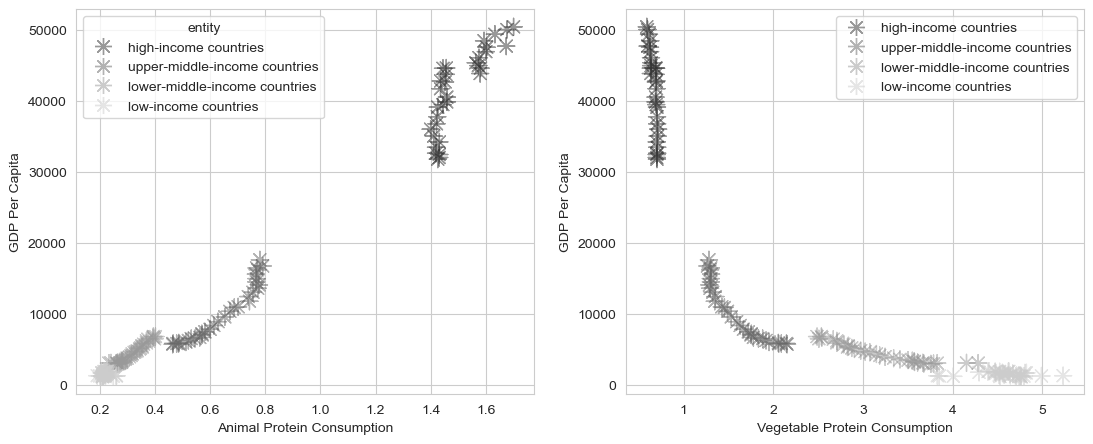

In [2563]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
                income_class.sort_values(by='gdp_per_capita',ascending=False),
                x='animal_protein_ratio',
                y='gdp_per_capita',hue='entity',
                palette='binary_r',marker=(8,2,0),s=150,alpha=.5)
plt.xlabel('Animal Protein Consumption')
plt.ylabel('GDP Per Capita')


plt.subplot(1, 2, 2)
sns.scatterplot(
                income_class.sort_values(by='gdp_per_capita',ascending=False),
                y='gdp_per_capita',
                x='veg_protein_ratio',hue='entity',
                palette='binary_r',marker=(8,2,0),s=150,alpha=.5)
plt.xlabel('Vegetable Protein Consumption')
plt.ylabel('GDP Per Capita')


plt.legend(loc='best')
plt.ylabel=('')

;

High-Income Countries:
Access and Affordability: In these countries, access to a diverse range of foods is generally higher due to well-developed food systems and greater affordability. However, lifestyle choices and the prevalence of processed foods can still lead to less-than-optimal diets.

Concerns: The focus in high-income countries is often shifting towards the quality of food and the overconsumption of certain food groups (like processed foods, red meats, sugary drinks), which can contribute to chronic diseases and negatively impact life expectancy.

Low-Income Countries:
Limited Access: Food insecurity and limited access to diverse foods remain major challenges. Diets might be heavily reliant on staple foods, leading to deficiencies in essential nutrients.   
Economic Factors: Economic constraints often dictate food choices, making it difficult for people to prioritize dietary diversity.   
Infectious Diseases: While nutrition plays a crucial role, life expectancy in lbow-income countries is also significantly affected by infectious diseases, access to healthcare, and other socioeconomic factors.

In [2653]:
income_class = income_class.sort_values(by='daily_caloric_intake')

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/4225333056.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  animalcor = income_class.groupby('entity').apply(lambda x: np.corrcoef(x['daily_cal_animal_protein'], x['life_exp'])[0, 1])
/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/4225333056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(animalcor,palette='pink_d')
/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/4225333056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is depre

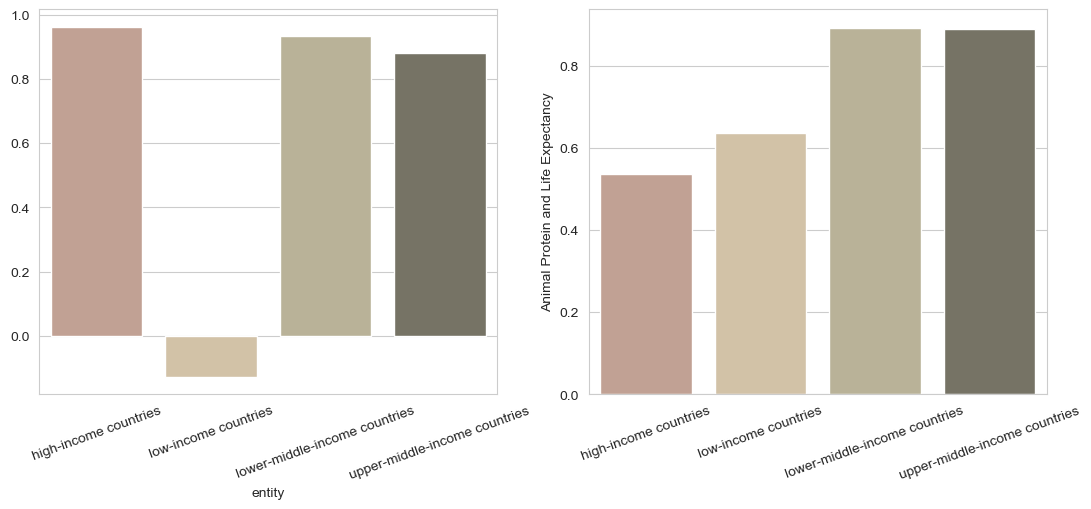

In [2661]:
animalcor = income_class.groupby('entity').apply(lambda x: np.corrcoef(x['daily_cal_animal_protein'], x['life_exp'])[0, 1])
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.barplot(animalcor,palette='pink_d')
plt.xticks(rotation = 20)
plt.subplot(1, 2, 2)
sns.barplot(carbcor,palette='pink_d')
plt.xticks(rotation = 20)
plt.xlabel('')
plt.ylabel('Animal Protein and Life Expectancy');

/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/873638553.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  carbcor = income_class.groupby('entity').apply(lambda x: np.corrcoef(x['daily_cal_veg_protein'], x['life_exp'])[0, 1])
/var/folders/q1/g8w_03zs6gvbwv16kzb3fvk80000gn/T/ipykernel_1109/873638553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(carbcor,palette='pink_d')


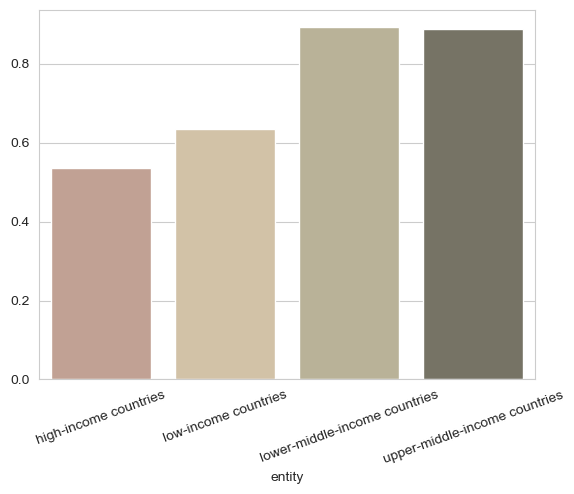

In [2651]:
carbcor = income_class.groupby('entity').apply(lambda x: np.corrcoef(x['daily_cal_veg_protein'], x['life_exp'])[0, 1])
sns.barplot(carbcor,palette='pink_d')
plt.xticks(rotation = 20);

# Searching for outliers 

In [101]:
# here we see high outliers who's protein consumption from vegetables is more than animal protein.

''

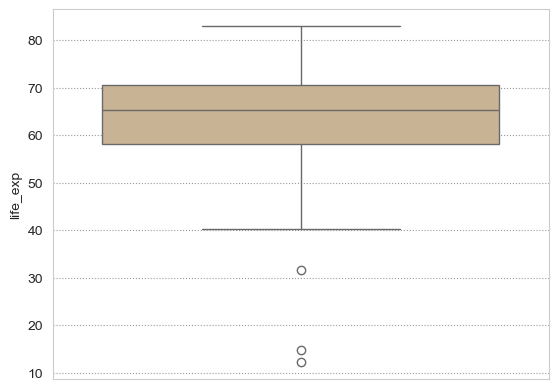

In [2256]:
sns.boxplot(more_veg['life_exp'],color='tan')

;

In [2176]:
Q1 = more_veg['life_exp'].quantile(0.25)
Q3 = more_veg['life_exp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

veg_bound  = more_veg[more_veg['life_exp'] < lower_bound]
veg_bound  =veg_bound.groupby(['entity','year']).agg({'gdp_per_capita':'mean','life_exp':'max','total_daily_protein':'max'}).sort_values(by='life_exp')

In [2178]:
veg_bound = veg_bound.reset_index()
veg_bound

,entity,year,gdp_per_capita,life_exp,total_daily_protein
0,Rwanda,1994,478.68646,12.1575,1.965295
1,Central African Republic,2009,1103.46370,14.6655,15.654466
2,Central African Republic,2019,861.76680,31.5302,17.519969


##### In 1994, Rwanda experienced a devastating genocide that had catastrophic consequences for the population, including a drastic drop in life expectancy. Over the course of approximately 100 days, from April to July 1994, an estimated 800,000 people, primarily from the Tutsi ethnic group, were killed by extremist Hutu militias. The violence was widespread and systematic, targeting men, women, and children.

This horrific event significantly impacted Rwanda's demographics and health indicators. The mass killings, combined with disease, displacement, and the destruction of infrastructure, led to a sharp decline in life expectancy, with some estimates showing it falling to as low as 14 years. This figure reflects the enormous loss of life, particularly among adults, and the fact that the remaining population was disproportionately young due to the high number of deaths. The genocide's aftermath left long-term effects on the country's health, economy, and social structure.

''

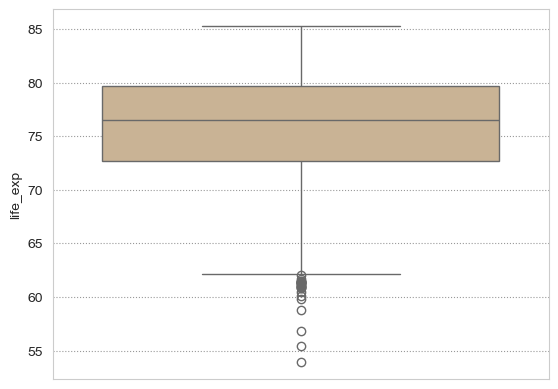

In [2260]:
sns.boxplot(more_meat['life_exp'],color='tan');
;

In [2262]:
lQ1 = more_meat['life_exp'].quantile(0.25)
lQ3 = more_meat['life_exp'].quantile(0.75)
lIQR = lQ3 - lQ1

llower_bound = lQ1 - 1.5 * lIQR
lupper_bound = lQ3 + 1.5 * lIQR 

low_meat_outliers  = more_meat[more_meat['life_exp'] < llower_bound]

In [2264]:
lowmeat= low_meat_outliers.groupby(['entity','region','year']).agg({'gdp_per_capita':'mean','life_exp':'mean','total_daily_protein':'mean'}).sort_values(by='total_daily_protein')
lowmeat = lowmeat.reset_index()
lowmeat.entity = lowmeat.entity.str.title()
lowmeat

,entity,region,year,gdp_per_capita,life_exp,total_daily_protein
0,Zimbabwe,Africa,2021,2115.1445,60.1347,24.819992
1,Zimbabwe,Africa,2013,2333.6445,56.8422,28.460000
2,Zimbabwe,Africa,2011,2033.1814,53.9112,29.389979
3,Zimbabwe,Africa,2012,2310.8071,55.3855,29.509998
4,Mongolia,Asia,1994,3870.8623,60.8555,31.754421
5,Mongolia,Asia,1995,4066.7532,60.8909,32.699826
6,Gabon,Africa,1999,16716.3710,61.6580,32.715152
7,Gabon,Africa,1997,18655.6520,61.3955,32.766098
8,Gabon,Africa,1991,18134.8160,60.8908,32.831361
9,Gabon,Africa,1992,17109.4020,61.0134,33.086517


<Axes: ylabel='life_exp'>

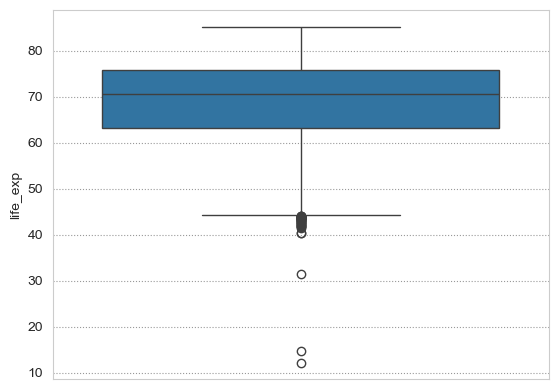

In [2193]:
sns.boxplot(df.life_exp)


In [851]:
sns.boxplot(df.life_exp)

rQ1 = df['life_exp'].quantile(0.25)
rQ3 = df['life_exp'].quantile(0.75)
rIQR = rQ3 - rQ1

rlower_bound = rQ1 - 1.5 * rIQR
rupper_bound = rQ3 + 1.5 * rIQR 

low_life  = df[df['life_exp'] < rlower_bound]
low_life.groupby(['year','region']).agg({'gdp_per_capita':'mean','life_exp':'mean','total_daily_protein':'mean',}).sort_values(by='year')

,,gdp_per_capita,life_exp,total_daily_protein
year,region,,,
1990,Africa,2310.265025,42.720450,6.727363
1991,Africa,2284.280575,43.231875,6.130193
1992,Africa,2067.965535,43.104750,6.357929
1993,Africa,1558.857970,43.208340,5.237103
1994,Africa,1566.613240,35.583150,4.469981
1995,Africa,958.845017,42.633767,3.854354
1996,Africa,969.615913,43.339733,3.998126
1997,Africa,875.639575,42.813900,3.939380
1998,Africa,899.384865,42.906450,3.886519


# diving deeper

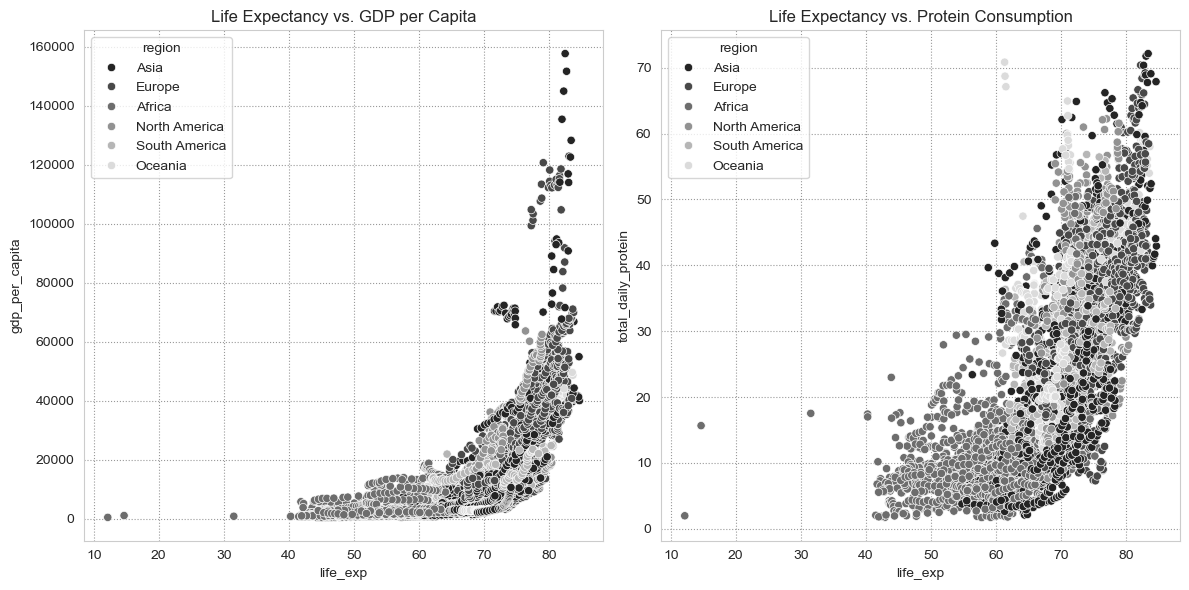

In [2186]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(y='gdp_per_capita', x='life_exp', data=df,hue='region',palette='binary_r')
plt.title('Life Expectancy vs. GDP per Capita')
plt.subplot(1, 2, 2)
sns.scatterplot(y='total_daily_protein', x='life_exp', data=df,hue='region',palette='binary_r')
plt.title('Life Expectancy vs. Protein Consumption')
plt.tight_layout()

plt.show()


In [653]:
# for tableau to show the diets of these countries and a map.

# What is the diet of countries with above average life expectancy and below average gdp? 

In [656]:
low_gdp_high_life =df.loc[(df['gdp_per_capita']< df['gdp_per_capita'].mean()) & (df['life_exp'] > df['life_exp'].mean())]

In [873]:
low_gdp_high_life_grouped = low_gdp_high_life.groupby(['entity','year']).agg({col: 'mean' for col in low_gdp_high_life.columns[3:14]})

In [875]:
low_gdp_high_life_grouped

fish   poultry       pork      beef  sheep/goat     other  \
entity  year                                                                   
Albania 1990   0.564898  1.077491   1.056568  2.981406    1.359940  0.010461   
        1991   0.167652  1.152605   0.722997  4.998112    1.414560  0.000000   
        1992   0.187805  0.313009   0.928594  4.997712    1.679815  0.010434   
        1993   0.165637  1.470027   1.262981  3.851057    1.728835  0.000000   
        1994   0.133552  1.705355   1.345792  4.170928    2.106010  0.010273   
...                 ...       ...        ...       ...         ...       ...   
Vietnam 2017  10.120000  4.420000  11.220000  1.240000    0.090000  0.010000   
        2018  10.450000  5.070000  11.450000  1.310000    0.100000  0.010000   
        2019  10.970001  6.210000   9.860001  1.550000    0.110000  0.130000   
        2020  10.880000  7.340000  10.490000  1.700000    0.110000  0.010000   
        2021  10.780001  8.790001  10.530001  2.370000    0.110000  0.140000   

                  eggs       milk  total_protein  life_exp  gdp_per_capita  
entity  year                                                                
Albania 1990  1.443628  15.534694          24.03   72.7096       4827.0513  
        1991  1.131648  17.383370          26.97   73.0011       3496.3867  
        1992  1.158134  18.822280          28.10   73.3030       3264.8367  
        1993  1.594254  19.441626          29.51   73.6377       3598.8280  
        1994  1.561530  23.679773          34.71   73.8367       3921.6340  
...                ...        ...            ...       ...             ...  
Vietnam 2017  0.880000   2.540000          30.52   74.0265       9050.6875  
        2018  0.980000   2.660000          32.03   74.1004       9636.0140  
        2019  1.140000   2.820000          32.79   74.2113      10252.0040  
        2020  1.310000   2.840000          34.68   75.3832      10450.6210  
        2021  1.130000   3.490000          37.34   74.1448      10628.2200  

[1328 rows x 11 columns]

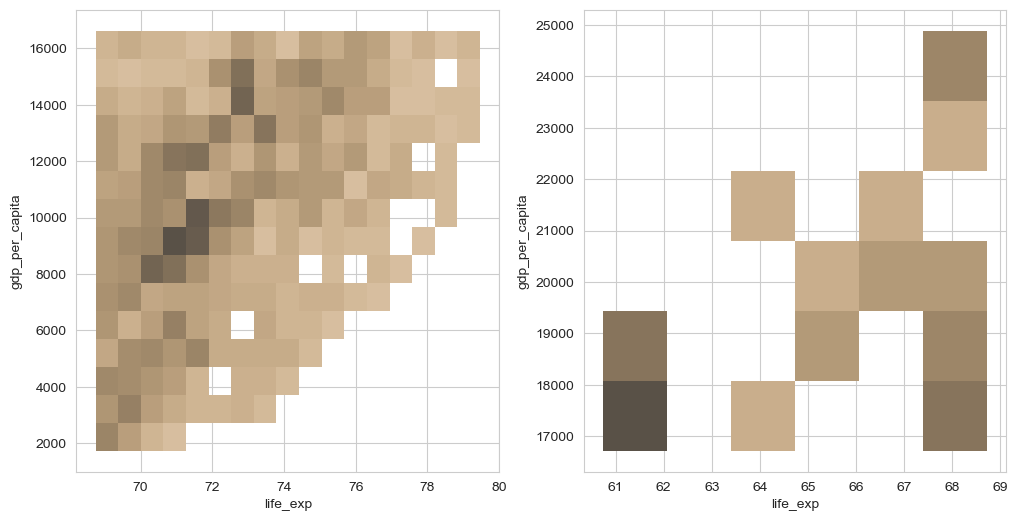

In [894]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot (low_gdp_high_life_grouped,x='life_exp',y='gdp_per_capita',color='tan')
plt.subplot(1, 2, 2)
sns.histplot (low_life_high_gdp_grouped,x='life_exp',y='gdp_per_capita',color='tan');

# What is the diet of countries with above average gdp and below average life_exp? 

In [1410]:
df.gdp_per_capita.mean()
print(f' The average GDP Per Capita is {df.gdp_per_capita.mean().round()}')

 The average GDP Per Capita is 16627.0


In [1400]:
low_life_high_gdp=df.loc[(df['gdp_per_capita']>= df['gdp_per_capita'].mean()) & (df['life_exp'] < df['life_exp'].mean())]

In [1402]:
low_life_high_gdp_grouped =low_life_high_gdp.groupby(['entity','year']).agg({col: 'mean' for col in low_gdp_high_life.columns[3:14]})

In [1404]:
low_life_high_gdp_grouped

fish    poultry      pork       beef  \
entity                year                                              
Gabon                 1990   9.103556   2.427615  1.204174   4.970830   
                      1991   9.460210   3.227261  1.531745   7.726160   
                      1992   9.388637   3.216210  1.723657   7.934601   
                      1993  12.249642   2.407556  2.070498   8.445705   
                      1994  10.524108   3.629998  2.070158   7.423684   
                      1995  11.493447   5.246171  1.992583   6.006626   
                      1996  13.503445   4.279464  1.995156   4.308379   
                      1997  13.299181   4.481246  1.840684   3.093505   
                      1998  13.697194   4.263493  2.122101   3.954824   
                      1999  12.887495   3.701420  2.091688   4.058067   
Guyana                2020   8.099930  24.569784  2.039982   1.819984   
                      2021   8.019991  27.889965  2.129997   1.449998   
Kazakhstan            2006   1.000842   4.571155  4.032240   7.843140   
                      2007   1.442821   4.357321  4.087994   8.435697   
                      2008   1.701313   4.056239  4.469552   8.323940   
                      2009   1.151834   3.849045  4.386568   8.408388   
                      2010   1.500000   7.050001  3.020000   9.700001   
Russia                1992   6.323077   3.371640  5.192526  11.625656   
                      2003   5.267574   5.527455  4.457947   7.196686   
                      2004   5.019212   5.369157  4.129352   7.078889   
                      2005   6.265788   5.955501  3.973670   7.246694   
                      2006   6.256382   6.787774  4.381473   6.938168   
                      2007   7.548075   7.517963  4.888182   7.096395   
                      2008   7.360248   7.641403  5.090922   7.651444   
                      2009   7.708236   7.748383  5.108714   7.035773   
                      2010   7.240000  10.100000  8.260000   7.260000   
Saint Kitts And Nevis 1996  10.889610  13.592069  2.602736   3.300788   
                      1997   7.957694  13.608663  2.639134   2.508184   
                      1998   5.517896  14.605025  2.356291   3.469812   
                      1999   8.337421  13.564613  2.317622   3.973067   
Suriname              2007   4.511154   9.051288  1.902992   2.675781   

                            sheep/goat      other      eggs       milk  \
entity                year                                               
Gabon                 1990    0.462403  10.249929  0.423869   1.685844   
                      1991    0.597284   9.855188  0.433513   2.061594   
                      1992    0.414063   9.956769  0.452580   2.176238   
                      1993    0.625964   9.755415  0.442990   2.783134   
                      1994    0.606604   9.638272  0.442918   1.993129   
                      1995    0.404292   9.173580  0.462048   2.204355   
                      1996    0.424091   9.175789  0.462645   2.313224   
                      1997    0.395121   9.184144  0.472217   2.987497   
                      1998    0.424420   9.211845  0.463004   2.874482   
                      1999    0.375925   9.128241  0.472317   2.804982   
Guyana                2020    0.489996   0.089999  0.359997  11.769897   
                      2021    0.489999   0.150000  0.389999  12.659985   
Kazakhstan            2006    2.704199   1.828462  1.818839  22.403473   
                      2007    2.876024   1.817955  2.068044  21.853935   
                      2008    3.018149   1.864717  2.306866  22.847584   
                      2009    3.061959   1.986913  2.447647  23.315039   
                      2010    3.910000   2.590000  2.640000  24.510002   
Russia                1992    0.880428   0.270131  4.322103  10.925316   
                      2003    0.349839   0.349839  4.018149  14.253436   
                      2004    0.379940   0.409936  3.939382  15.13762

# who life expectancy above average and what do they eat?

In [2188]:
longest_living=df.loc[df['life_exp']>= 80]
longest_life = longest_living.groupby('entity').agg({'life_exp':'mean'}).sort_values(by='life_exp')
longest_life = longest_life.reset_index()

long_life_list = longest_life.entity.tolist() 

longest_life_countries = df.loc[df['entity'].isin(long_life_list)]
longlife_grouped = longest_life_countries.groupby('entity').agg({'fish':'mean',
                                                                 'poultry':'mean',
                                                                 'pork':'mean',
                                                                 'beef':'mean',
                                                                 'sheep/goat':'mean',
                                                                 'eggs':'mean',
                                                                 'milk':'mean',
                                                                 'daily_cal_animal_protein':'mean',
                                                                 'daily_cal_veg_protein':'mean',
                                                                 'life_exp':'max',
                                                                 'gdp_per_capita':'mean'})


longlife_grouped

,fish,poultry,pork,beef,sheep/goat,eggs,milk,daily_cal_animal_protein,daily_cal_veg_protein,life_exp,gdp_per_capita
entity,,,,,,,,,,,
Australia,5.669656,15.117650,5.983366,14.960073,5.167675,2.088509,20.118009,300.365364,146.208235,83.6639,41216.892406
Austria,3.358931,7.414721,18.240508,7.388562,0.435358,4.224108,21.775237,259.838438,162.240696,81.9072,48144.651344
Bahrain,5.449989,21.749953,0.423333,5.743323,9.666647,3.383326,13.053301,249.972793,186.639627,80.4706,49172.479333
Belgium,5.955215,6.514417,10.026383,6.102917,0.573321,3.511369,24.406144,245.336547,160.017732,81.8353,47859.735909
Canada,5.688175,14.153656,8.030746,12.054233,0.376128,3.670012,14.749594,242.320126,180.453294,82.2848,42516.185563
Chile,4.144056,11.442395,6.204839,8.773425,0.269331,2.210375,9.810666,177.391569,171.835230,80.6096,18567.623062
Costa Rica,2.832083,7.982454,2.592375,6.632109,0.005619,2.969632,15.092968,156.888429,138.944142,80.4069,15068.135672
Cyprus,5.446666,10.503117,10.452760,2.641407,3.154793,2.531428,13.928510,204.411835,154.659957,81.5558,34309.342438
Denmark,7.758548,8.347357,10.563159,8.991837,0.363480,5.371245,23.429499,282.637548,151.895274,81.5458,49407.277094
